In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("Hofstadter_SP.jl")

In [4]:
Nx = 6
Ny = 6
p = 1
q = 6
pn = 3
U = 2

N = Nx*Ny
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

6

In [5]:
matrix = Hofstadter_SP(Nx, Ny, p/q ,0);
H = Sp_Op(N, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N, H, Cut_Off)
H_MB = H_Kin_MB(Sub_Basis, PN, H_sp_Sub)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN)
H_Total = H_Total_Sub(PN, P, Pt, basis_cut_mb, Cut_Off, U, H_MB);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [6]:
E, λ = eigenstates(H_Total);

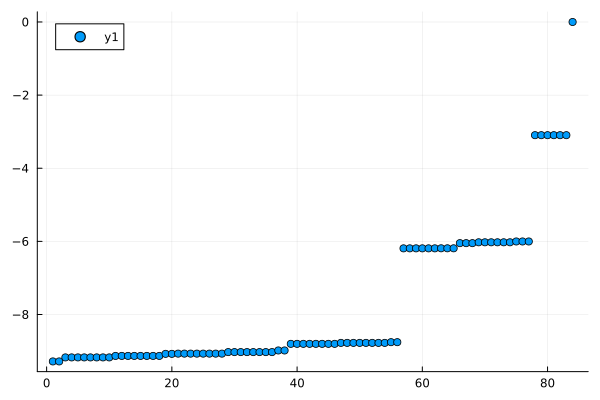

In [7]:
scatter(E)